In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
gvn = cv2.imread('benimDATA2/FIVECLASSES/train/NORMAL/img_34.jpg')
gvn = cv2.cvtColor(gvn,cv2.COLOR_BGR2RGB)

In [3]:
type(gvn)

numpy.ndarray

In [4]:
gvn.shape

(480, 640, 3)

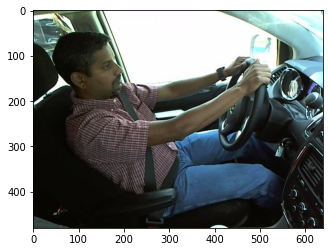

In [5]:
plt.imshow(gvn)

In [6]:
solkns = cv2.imread('benimDATA2/FIVECLASSES/train/SOLKONUSMA/img_445.jpg')
solkns = cv2.cvtColor(solkns,cv2.COLOR_BGR2RGB)

In [7]:
solkns.shape

(480, 640, 3)

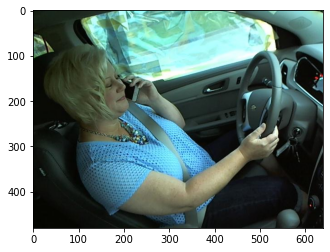

In [8]:
plt.imshow(solkns)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
image_gen = ImageDataGenerator(rotation_range=30, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               rescale=1/255, 
                               shear_range=0.2, 
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )

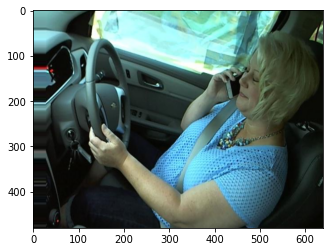

In [11]:
plt.imshow(image_gen.random_transform(solkns))

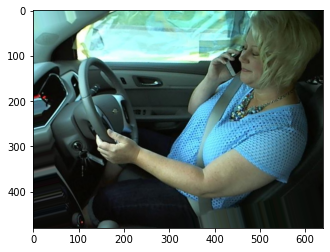

In [12]:
plt.imshow(image_gen.random_transform(solkns))

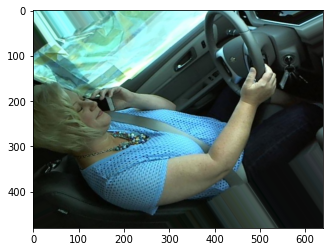

In [13]:
plt.imshow(image_gen.random_transform(solkns))

In [14]:
image_gen.flow_from_directory('benimDATA2/FIVECLASSES/train')

Found 9675 images belonging to 5 classes.


In [15]:
image_gen.flow_from_directory('benimDATA2/FIVECLASSES/test')

Found 2070 images belonging to 5 classes.


In [16]:
# width,height,channels
image_shape = (320,240,3)

# Creating the Model

In [17]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [18]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(320,240,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(320,240,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(320,240,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3,3),input_shape=(320,240,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3,3),input_shape=(320,240,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 318, 238, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 159, 119, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 157, 117, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 78, 58, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 76, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 38, 28, 128)      0

### Training the Model

In [20]:
batch_size = 64

train_image_gen = image_gen.flow_from_directory('benimDATA2/FIVECLASSES/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 9675 images belonging to 5 classes.


In [21]:
test_image_gen = image_gen.flow_from_directory('benimDATA2/FIVECLASSES/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 2070 images belonging to 5 classes.


In [22]:
train_image_gen.class_indices

{'NORMAL': 0, 'SAGKONUSMA': 1, 'SAGMESAJ': 2, 'SOLKONUSMA': 3, 'SOLMESAJ': 4}

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
results = model.fit_generator(train_image_gen,epochs=50,
                              validation_data=test_image_gen)

Epoch 1/50
152/152 [==============================] - 603s 4s/step - loss: 1.7760 - accuracy: 0.2103 - val_loss: 1.6097 - val_accuracy: 0.2005
Epoch 2/50
152/152 [==============================] - 604s 4s/step - loss: 1.5823 - accuracy: 0.2479 - val_loss: 1.5650 - val_accuracy: 0.3039
Epoch 3/50
152/152 [==============================] - 601s 4s/step - loss: 1.3159 - accuracy: 0.4210 - val_loss: 1.1829 - val_accuracy: 0.4995
Epoch 4/50
152/152 [==============================] - 619s 4s/step - loss: 0.9347 - accuracy: 0.6243 - val_loss: 1.0889 - val_accuracy: 0.6092
Epoch 5/50
152/152 [==============================] - 604s 4s/step - loss: 0.6279 - accuracy: 0.7672 - val_loss: 0.7048 - val_accuracy: 0.7435
Epoch 6/50
152/152 [==============================] - 570s 4s/step - loss: 0.4316 - accuracy: 0.8495 - val_loss: 1.0336 - val_accuracy: 0.6913
Epoch 7/50
152/152 [==============================] - 568s 4s/step - loss: 0.3343 - accuracy: 0.8892 - val_loss: 0.6109 - val_accuracy: 0.8179

In [25]:
model.save('320x240_50epochs_fivelayers_fiveclasses_increasedfilters_grafikicin.h5')

# Evaluating the Model

In [26]:
results.history['accuracy']

[0.21033591032028198,
 0.2478552907705307,
 0.42098191380500793,
 0.6242893934249878,
 0.7672351598739624,
 0.849509060382843,
 0.8891989588737488,
 0.9123514294624329,
 0.9282687306404114,
 0.9326097965240479,
 0.9432558417320251,
 0.9469767212867737,
 0.9410852789878845,
 0.9522480368614197,
 0.9518346190452576,
 0.9508010149002075,
 0.951731264591217,
 0.952558159828186,
 0.9557622671127319,
 0.9488372206687927,
 0.9534883499145508,
 0.9427390098571777,
 0.9534883499145508,
 0.9534883499145508,
 0.9608268737792969,
 0.9591731429100037,
 0.9440826773643494,
 0.9531782865524292,
 0.9511111378669739,
 0.9536951184272766,
 0.955968976020813,
 0.9579328298568726,
 0.9589664340019226,
 0.9584496021270752,
 0.9553488492965698,
 0.9609302282333374,
 0.9571059346199036,
 0.9565891623497009,
 0.9562790989875793,
 0.9447028636932373,
 0.9555555582046509,
 0.9526615142822266,
 0.9511111378669739,
 0.9522480368614197,
 0.9486305117607117,
 0.9575193524360657,
 0.9505943059921265,
 0.950801014900

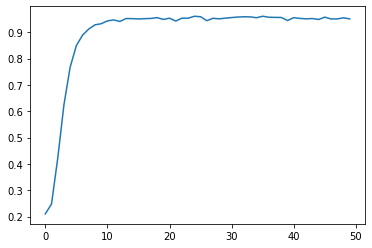

In [27]:
plt.plot(results.history['accuracy'])

# TESTING ON A SAFE DRIVING EXAMPLE

In [29]:
train_image_gen.class_indices

{'NORMAL': 0, 'SAGKONUSMA': 1, 'SAGMESAJ': 2, 'SOLKONUSMA': 3, 'SOLMESAJ': 4}

In [30]:
import numpy as np
from keras.preprocessing import image

gvn_file = 'benimDATA2/FIVECLASSES/test/NORMAL/img_4733.jpg'

gvn_img = image.load_img(gvn_file, target_size=(320, 240))

gvn_img = image.img_to_array(gvn_img)

gvn_img = np.expand_dims(gvn_img, axis=0)
gvn_img = gvn_img/255

In [31]:
prediction_prob = model.predict(gvn_img)

In [32]:
# Output prediction
print(f'NORMAL - SAGKONUSMA - SAGMESAJ - SOLKONUSMA - SOLMESAJ: {prediction_prob} ')

NORMAL - SAGKONUSMA - SAGMESAJ - SOLKONUSMA - SOLMESAJ: [[9.9997997e-01 6.8479579e-07 1.8066630e-05 1.7204611e-07 1.0509905e-06]] 
